Dataset preview:
   Age  Bought insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


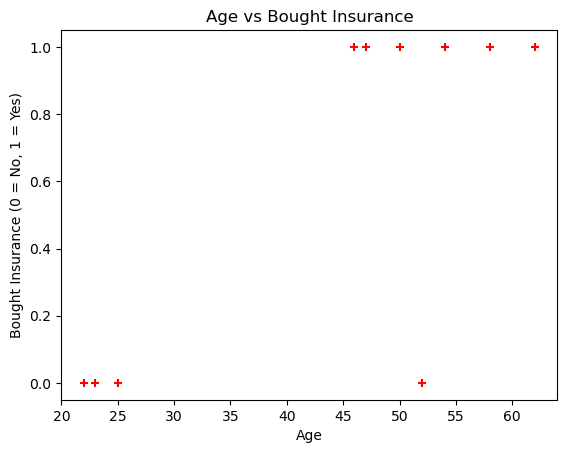

Test data preview:
   Age
6   23
7   58

Predicted values for test data:
[0 1]

Model Accuracy: 1.00

Predicted probabilities for the test data:
[[0.94658073 0.05341927]
 [0.06642467 0.93357533]]

Model coefficient (m): [[0.1576468]]
Model intercept (b): [-6.50056102]

Predicted probability for age 35: 0.2723
Predicted probability for age 43: 0.5691


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

try:
    df = pd.read_csv("C:\\Users\\sengo\\LAB\\insurance.csv")
    print("Dataset preview:")
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'insurance.csv' was not found. Please check the file path.")
    exit()

plt.scatter(df['Age'], df['Bought insurance'], marker='+', color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance (0 = No, 1 = Yes)')
plt.title('Age vs Bought Insurance')
plt.show()

if 'Age' not in df.columns or 'Bought insurance' not in df.columns:
    print("Error: The dataset does not contain required columns 'Age' and 'Bought insurance'.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Bought insurance'], train_size=0.8)
print("Test data preview:")
print(X_test.head())

model = LogisticRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print("\nPredicted values for test data:")
print(y_predicted)

accuracy = model.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nPredicted probabilities for the test data:")
print(model.predict_proba(X_test))

print("\nModel coefficient (m):", model.coef_)
print("Model intercept (b):", model.intercept_)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(age):
    z = model.coef_[0][0] * age + model.intercept_[0]
    y = sigmoid(z)
    return y

age = 35
pred_35 = prediction_function(age)
print(f"\nPredicted probability for age {age}: {pred_35:.4f}")

age = 43
pred_43 = prediction_function(age)
print(f"Predicted probability for age {age}: {pred_43:.4f}")
